# Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pickle # Read and Save model - Serialization
from datetime import datetime
import os

# load the dataframe

In [2]:
train_store_df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\pharma project-6\Pharma-project-6\train_store_merged_dataset.csv", parse_dates = True, low_memory = False)

In [3]:
train_store_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [4]:
train_store_df.shape

(1017209, 18)

In [5]:
train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [6]:
## Convert the 'Date' column to datetime format
train_store_df['Date'] = pd.to_datetime(train_store_df['Date'])

In [7]:
train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [8]:
# Ensure the 'Date' column is in datetime format
train_store_df['Date'] = pd.to_datetime(train_store_df['Date'])

# Create new columns based on the 'Date' column
train_store_df['Day'] = train_store_df['Date'].dt.day
train_store_df['WeekOfYear'] = train_store_df['Date'].dt.isocalendar().week
train_store_df['Month'] = train_store_df['Date'].dt.month
train_store_df['Year'] = train_store_df['Date'].dt.year

In [9]:
## columns to use
#columns = ['DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
#       'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear']

# Label Date and StateHoliday Train
columns = ['Sales', 'Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Day', 'WeekOfYear', 
           'Month', 'Year', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2']

feature_columns = ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Day', 'WeekOfYear', 
                   'Month', 'Year', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2']

sample_size = 1000
sampled_df = train_store_df[columns].sample(sample_size)

# Separate Test and Train files
train_x = sampled_df[feature_columns]
train_y = sampled_df[['Sales']]
train_x.head()


,Store,DayOfWeek,Open,Promo,SchoolHoliday,Day,WeekOfYear,Month,Year,StoreType,Assortment,CompetitionDistance,Promo2
869259,345,1,1,1,0,13,20,5,2013,a,a,120.0,1
351688,364,6,1,0,0,30,35,8,2014,a,c,13620.0,1
727152,958,3,1,0,0,18,38,9,2013,a,a,440.0,0
189191,757,4,1,0,0,12,7,2,2015,a,c,3450.0,0
433824,875,7,0,0,0,8,23,6,2014,d,a,5070.0,1


In [10]:
## Label encoding
label_encoder = LabelEncoder()
train_x['StoreType'] = label_encoder.fit_transform(train_x['StoreType']) ## Encoding the 'StoreType' column using label encoding
train_x['Assortment'] = label_encoder.fit_transform(train_x['Assortment']) ## Encoding the 'Assortment' column using label encoding

train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 869259 to 29265
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1000 non-null   int64  
 1   DayOfWeek            1000 non-null   int64  
 2   Open                 1000 non-null   int64  
 3   Promo                1000 non-null   int64  
 4   SchoolHoliday        1000 non-null   int64  
 5   Day                  1000 non-null   int32  
 6   WeekOfYear           1000 non-null   UInt32 
 7   Month                1000 non-null   int32  
 8   Year                 1000 non-null   int32  
 9   StoreType            1000 non-null   int32  
 10  Assortment           1000 non-null   int32  
 11  CompetitionDistance  1000 non-null   float64
 12  Promo2               1000 non-null   int64  
dtypes: UInt32(1), float64(1), int32(5), int64(6)
memory usage: 86.9 KB


In [11]:
# Encoded features
train_x[['StoreType', 'Assortment']]

,StoreType,Assortment
869259,0,0
351688,0,2
727152,0,0
189191,0,2
433824,3,0
...,...,...
673707,0,0
678822,0,0
1012045,3,2
317873,3,2


In [12]:
# Initialize the scalers
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Scale the features
#X = x_scaler.fit_transform(train_x)
X = train_x
# Scale the target variable
Y = y_scaler.fit_transform(train_y)

In [13]:
X.shape, Y.shape

((1000, 13), (1000, 1))

In [14]:
split_size = int(0.8 * len(X))  # Splitting the dataset into 80% for training and 20% for testing

X_train, y_train = X[:split_size], Y[:split_size]  # Assigning the first 80% of the data to the training set
X_test, y_test = X[split_size:], Y[split_size:]  # Assigning the remaining 20% of the data to the testing set

# Printing the lengths of the training and testing sets
print(f"Training set size: X={len(X_train)}, y={len(y_train)}")
print(f"Testing set size: X={len(X_test)}, y={len(y_test)}")

Training set size: X=800, y=800
Testing set size: X=200, y=200


In [15]:
from sklearn.ensemble import RandomForestRegressor


random_forest_regressor = RandomForestRegressor()
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
random_forest_regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [16]:
# Make Predictions
predictions = random_forest_regressor.predict(X_test)

In [17]:
## Calculate the prediction score of the model
score = random_forest_regressor.score(X_test, y_test)
print(f"Prediction Score of the Model is {round(score * 100, 2)}%")

Prediction Score of the Model is 57.89%


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.007417031009000647
R^2 Score: 0.5788707564095277


# 2.2 Building models with sklearn pipelines

In [19]:
split_size = int(0.8 * len(X))  # Splitting the dataset into 80% for training and 20% for testing

X_train, y_train = X[:split_size], Y[:split_size]  # Assigning the first 80% of the data to the training set
X_test, y_test = X[split_size:], Y[split_size:]  # Assigning the remaining 20% of the data to the testing set

# Printing the lengths of the training and testing sets
print(f"Training set size: X={len(X_train)}, y={len(y_train)}")
print(f"Testing set size: X={len(X_test)}, y={len(y_test)}")

Training set size: X=800, y=800
Testing set size: X=200, y=200


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

### Define the pipelines ###

rfr = Pipeline(steps=[
    ('scaler1', MinMaxScaler()),
    ('rf_regression', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0))
])

lr = Pipeline(steps=[
    ('scaler2', MinMaxScaler()),
    ('lr_regression', LinearRegression())
])

dt = Pipeline(steps=[
    ('scaler3', MinMaxScaler()),
    ('dt_regression', DecisionTreeRegressor(random_state=0))
])

In [22]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

numerical_features = ['DayOfWeek', 'Open', 'Promo', 'CompetitionDistance']
categorical_features = ['StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Defining the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increase `max_iter` if needed
])


In [24]:
rfr.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

Pipeline(steps=[('scaler3', MinMaxScaler()),
                ('dt_regression', DecisionTreeRegressor(random_state=0))])

In [25]:
rfr_score = rfr.score(X_test, y_test)
lr_score = lr.score(X_test, y_test)
dt_score = dt.score(X_test, y_test)

print(f"Prediction Score of the RandomForestRegressiion is {round(rfr_score * 100, 2)}%")
print(f"Prediction Score of the LinearRegression is {round(lr_score * 100, 2)}%")
print(f"Prediction Score of the DecisionTree is {round(dt_score * 100, 2)}%")

# print(rfr_score)

Prediction Score of the RandomForestRegressiion is 58.64%
Prediction Score of the LinearRegression is 56.38%
Prediction Score of the DecisionTree is 22.29%


# 2.3 Choose a loss function

In [26]:
rfr_prediction = rfr.predict(X_test)
lr_prediction = lr.predict(X_test)
dt_prediction = dt.predict(X_test)

rfr_rmse = mean_squared_error(y_test, rfr_prediction, squared=False)
lr_rmse = mean_squared_error(y_test, lr_prediction, squared=False)
dt_rmse = mean_squared_error(y_test, dt_prediction, squared=False)

print(f"RandomForest Root Mean Square Loss : {rfr_rmse}")
print(f"Linear Root Mean Square Loss : {lr_rmse}")
print(f"DecisionTree Root Mean Square Loss : {dt_rmse}")

RandomForest Root Mean Square Loss : 0.08535058471910853
Linear Root Mean Square Loss : 0.08765011134249061
DecisionTree Root Mean Square Loss : 0.11698557270042388


# 2.4 Post Prediction analysis

In [27]:
important_features = rfr[1].feature_importances_

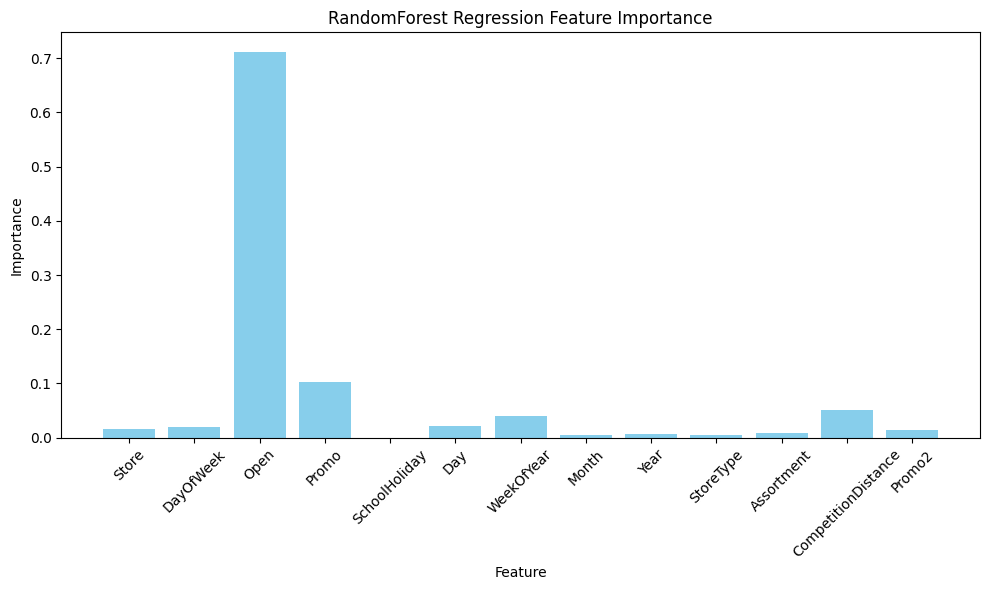

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(feature_columns, important_features, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('RandomForest Regression Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

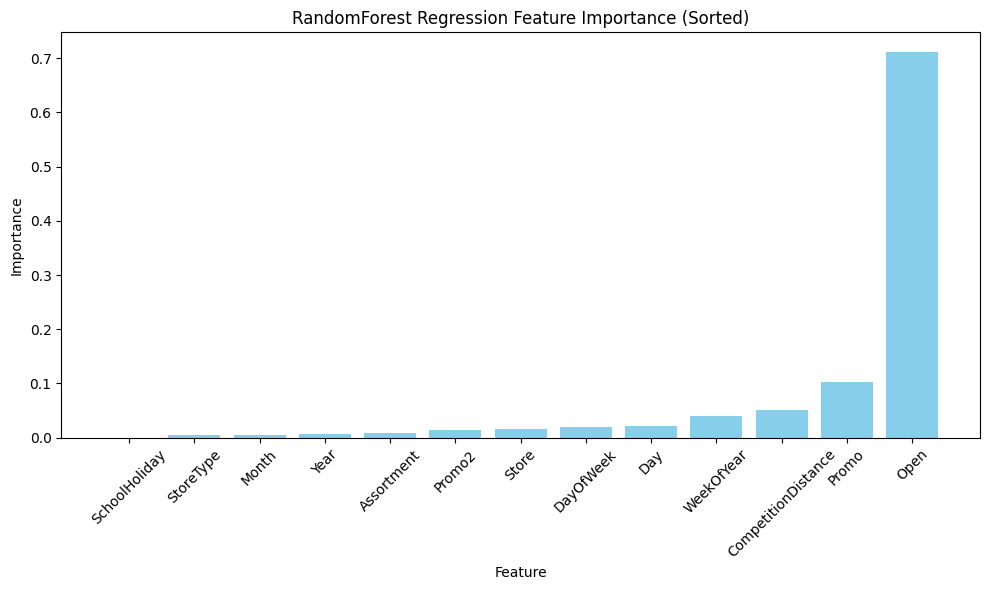

In [29]:
sorted_indices = important_features.argsort()
sorted_features = [feature_columns[i] for i in sorted_indices]
sorted_importances = important_features[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('RandomForest Regression Feature Importance (Sorted)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
important_features = lr[1].coef_[0]
from matplotlib import pyplot as plt

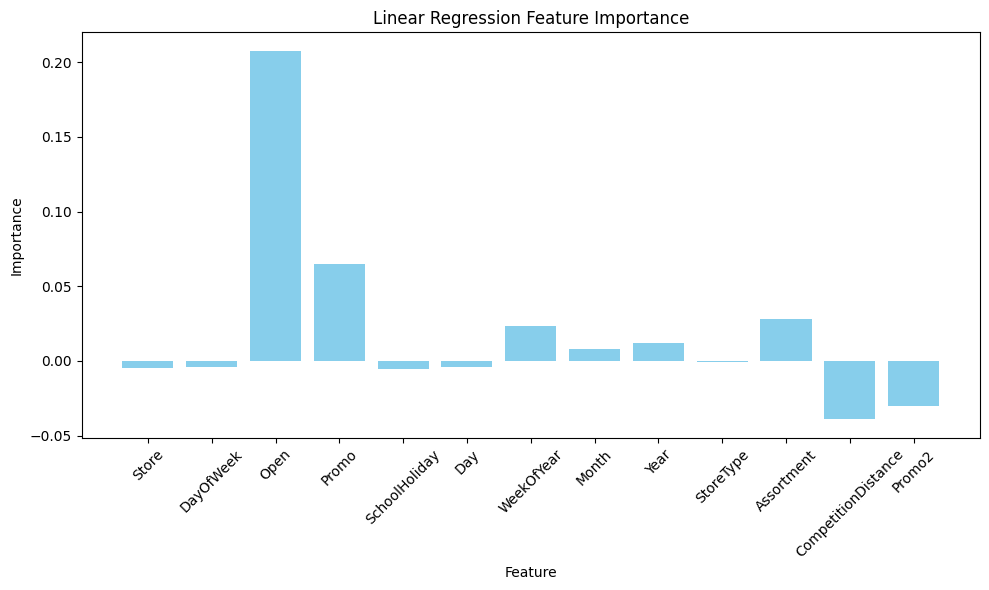

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(feature_columns, list(important_features), color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Linear Regression Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
important_features = dt[1].feature_importances_

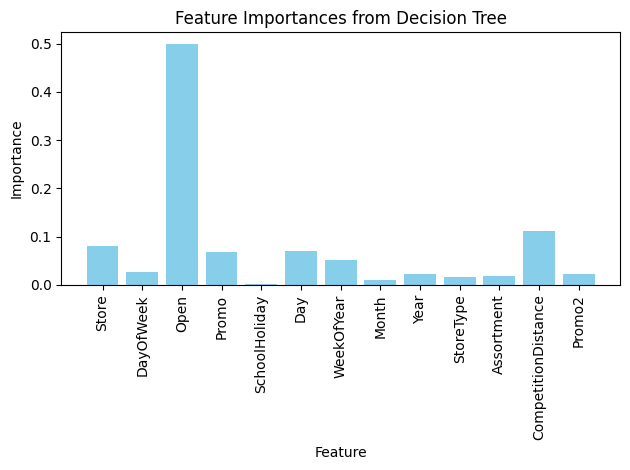

In [33]:
important_features = dt[1].feature_importances_
plt.bar(feature_columns, important_features, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.tight_layout()
plt.show()

# 2.5 Serialize models

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from joblib import dump
from datetime import datetime

# Assuming X_train, X_test, y_train, y_test are already defined as per your previous message

# Initialize the models
random_forest_model = RandomForestRegressor(random_state=42)
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the models on the training set
random_forest_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [35]:
# Function to generate a timestamped filename for model serialization
def generate_filename(model_name):
    now = datetime.now()
    timestamp_str = now.strftime("%d-%m-%Y-%H-%M-%S-00")
    filename = f"{model_name}_{timestamp_str}.pkl"
    return filename

# Generate filenames with timestamp for each model
random_forest_filename = generate_filename("random_forest_model")
linear_model_filename = generate_filename("linear_model")
decision_tree_filename = generate_filename("decision_tree_model")

# Serialize and save the models to disk with the timestamped filenames
dump(random_forest_model, random_forest_filename)
dump(linear_model, linear_model_filename)
dump(decision_tree_model, decision_tree_filename)

# Outputting the saved filenames
print("Models saved:")
print(random_forest_filename)
print(linear_model_filename)
print(decision_tree_filename)

Models saved:
random_forest_model_02-04-2024-22-33-46-00.pkl
linear_model_02-04-2024-22-33-46-00.pkl
decision_tree_model_02-04-2024-22-33-46-00.pkl


### Load a Saved Model

In [39]:
from sklearn.metrics import r2_score
import joblib

# Assume X_test and y_test are already loaded and represent your test dataset

model_paths = [
    "random_forest_model_02-04-2024-22-33-46-00.pkl",
    "linear_model_02-04-2024-22-33-46-00.pkl",
    "decision_tree_model_02-04-2024-22-33-46-00.pkl"
]

model_names = [
    "Random Forest",
    "Linear Model",
    "Decision Tree"
]

# Initialize a list to store model names and their corresponding R^2 scores
model_scores = []

# Load, predict, and calculate R^2 score for each model
for model_path, model_name in zip(model_paths, model_names):
    model = joblib.load(model_path)  # Load the model
    predictions = model.predict(X_test)  # Predict with the loaded model
    score = r2_score(y_test, predictions)  # Calculate R^2 score
    model_scores.append([model_name, score])  # Append the name and score to the list

# Convert the list to a DataFrame
score_df = pd.DataFrame(model_scores, columns=["Model Name", "R^2 Score"])
score_df


,Model Name,R^2 Score
0,Random Forest,0.578362
1,Linear Model,0.563797
2,Decision Tree,0.165208


In [40]:
# Save the DataFrame to a CSV file
score_df.to_csv("model_scores.csv", index=False)

print("Model scores saved to model_scores.csv")


Model scores saved to model_scores.csv


In [41]:
data = {
    "Model Name": ["Random Forest", "Linear Model", "Decision Tree"],
    "R^2 Score": [-0.222655, 0.049983, -1.455675]
}

df = pd.DataFrame(data)


In [42]:
# Serialize the DataFrame with pickle

# Specify the filename
filename = 'model_scores.pkl'

# Open the file in binary write mode and dump the DataFrame
with open(filename, 'wb') as file:
    pickle.dump(df, file)

In [43]:
# Open the file in binary read mode and load the DataFrame
with open(filename, 'rb') as file:
    loaded_df = pickle.load(file)

# Display the loaded DataFrame
print(loaded_df)


      Model Name  R^2 Score
0  Random Forest  -0.222655
1   Linear Model   0.049983
2  Decision Tree  -1.455675
